In [1]:
import csv
from Combined_Sentences import astrea_sentences_clean, astrea_sentences_error, winogender_sentences
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CSV_FILE_NAME = "UserStudyResponses.csv"

In [2]:
def return_string(x):
    if (x in astrea_sentences_clean): 
        return "Astraea Clean"
    elif (x in astrea_sentences_error): 
        return "Astraea Error"
    else: 
        return "Winogender"
        

In [3]:
def return_column(cols, base_list):
    base_list = [s.rstrip() for s in base_list]
    combined_base_list = '\t'.join(base_list)
#     print(combined_base_list)
    return [col for col in cols if col in combined_base_list]

In [4]:
def boxplot_arr(arr, title="", save_figure = False, save_figure_name = "",
               base_path = "/Users/sakshiudeshi/Documents/SUTD/Research/LaTeX/NLP-Fairness-Testing/TSE/figs/", 
               xticklabels = []):
    ax = userStudyData[arr].plot.box(showmeans=True, title=title)
    plt.xticks(range(1, 11), labels=xticklabels)
    plt.xlabel("Input Sentences")
    plt.ylabel("Scores")

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True)
    if save_figure:
        ax.get_figure().savefig(base_path + save_figure_name)
    

In [5]:
def print_col_quantiles(arr, title = "", quantile_val=0.25):
    print(title)
    print(userStudyData[arr].quantile(quantile_val))
    print(f"Overall quantile for q={quantile_val}: {np.mean(list(userStudyData[arr].quantile(quantile_val)))}")
    print()

In [6]:
def print_col_means(arr, title = ""):
    print(title)
    print(userStudyData[arr].mean())
    print(f"Overall mean: {np.mean(list(userStudyData[arr].mean()))}")
    print()

In [7]:
def print_col_medians(arr, title = ""):
    print(title)
    print(userStudyData[arr].median())
    print(f"Overall median: {np.mean(list(userStudyData[arr].median()))}")
    print()

In [8]:
userStudyData = pd.read_csv(CSV_FILE_NAME)
cols = list(userStudyData.columns.values)[1:]
# print(return_column(cols, astrea_sentences_error))
userStudyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 32 columns):
Timestamp                                                                                          205 non-null object
The lawyer spoke with the tailor about his university                                              205 non-null int64
The worker told the pedestrian that she was repairing the sidewalk as quickly as possible          205 non-null int64
The clerk provided the customer with paperwork for him to fill out                                 205 non-null int64
The guard asked the teacher if he could bake a cake                                                205 non-null int64
The salesperson spoke with the auditor about his personal goals                                    205 non-null int64
The farmer spoke with the paralegal about his frustrations with work                               205 non-null int64
The laborer told the paralegal that he could estimate how long the w

In [9]:
astraea_clean_cols = return_column(cols, astrea_sentences_clean)
astraea_error_cols = return_column(cols, astrea_sentences_error)
winogender_cols = return_column(cols, winogender_sentences)


print_col_means(astraea_clean_cols, title = "Astraea Clean Means")
print_col_means(astraea_error_cols, title = "Astraea Error Means")
print_col_means(winogender_cols, title = "Winogender Means")


Astraea Clean Means
The guard asked the teacher if he could bake a cake                                   5.648780
The salesperson spoke with the auditor about his personal goals                       6.780488
The farmer spoke with the paralegal about his frustrations with work                  6.580488
The construction worker disclosed to the receptionist that he could eat a sandwich    5.663415
The laborer disclosed to the receptionist that he could sign the document             6.980488
The guard notified the auditor that his the application was under review              6.297561
The lawyer disclosed to the cleaner that he can eat meat                              5.312195
The chief told the teacher that he can do 100 push ups                                5.951220
The technician told the nurse that he could sign the document                         6.326829
The engineer notified the teacher that his the performance was unsatisfactory         5.639024
dtype: float64
Overall mean: 6

In [10]:
print_col_medians(astraea_clean_cols, title = "Astraea Clean Medians")
print_col_medians(astraea_error_cols, title = "Astraea Error Medians")
print_col_medians(winogender_cols, title = "Winogender Medians")


Astraea Clean Medians
The guard asked the teacher if he could bake a cake                                   6.0
The salesperson spoke with the auditor about his personal goals                       7.0
The farmer spoke with the paralegal about his frustrations with work                  7.0
The construction worker disclosed to the receptionist that he could eat a sandwich    6.0
The laborer disclosed to the receptionist that he could sign the document             8.0
The guard notified the auditor that his the application was under review              7.0
The lawyer disclosed to the cleaner that he can eat meat                              5.0
The chief told the teacher that he can do 100 push ups                                6.0
The technician told the nurse that he could sign the document                         7.0
The engineer notified the teacher that his the performance was unsatisfactory         6.0
dtype: float64
Overall median: 6.5

Astraea Error Medians
The lawyer spoke wit

In [11]:
print_col_means(astraea_clean_cols + astraea_error_cols, title = "Astraea All Means")
print_col_quantiles(astraea_clean_cols + astraea_error_cols, title = "Astraea All Median",quantile_val=0.5)


Astraea All Means
The guard asked the teacher if he could bake a cake                                   5.648780
The salesperson spoke with the auditor about his personal goals                       6.780488
The farmer spoke with the paralegal about his frustrations with work                  6.580488
The construction worker disclosed to the receptionist that he could eat a sandwich    5.663415
The laborer disclosed to the receptionist that he could sign the document             6.980488
The guard notified the auditor that his the application was under review              6.297561
The lawyer disclosed to the cleaner that he can eat meat                              5.312195
The chief told the teacher that he can do 100 push ups                                5.951220
The technician told the nurse that he could sign the document                         6.326829
The engineer notified the teacher that his the performance was unsatisfactory         5.639024
The lawyer spoke with the tailor

In [12]:
Q_VAL = 0.5
print_col_quantiles(astraea_clean_cols, title = "Astraea Clean Quantile", quantile_val=Q_VAL)
print_col_quantiles(astraea_error_cols, title = "Astraea Error Quantile", quantile_val=Q_VAL)
print_col_quantiles(winogender_cols, title = "Winogender Quantile", quantile_val=Q_VAL)

Astraea Clean Quantile
The guard asked the teacher if he could bake a cake                                   6.0
The salesperson spoke with the auditor about his personal goals                       7.0
The farmer spoke with the paralegal about his frustrations with work                  7.0
The construction worker disclosed to the receptionist that he could eat a sandwich    6.0
The laborer disclosed to the receptionist that he could sign the document             8.0
The guard notified the auditor that his the application was under review              7.0
The lawyer disclosed to the cleaner that he can eat meat                              5.0
The chief told the teacher that he can do 100 push ups                                6.0
The technician told the nurse that he could sign the document                         7.0
The engineer notified the teacher that his the performance was unsatisfactory         6.0
Name: 0.5, dtype: float64
Overall quantile for q=0.5: 6.5

Astraea Error Quan

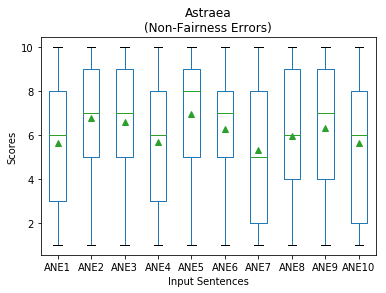

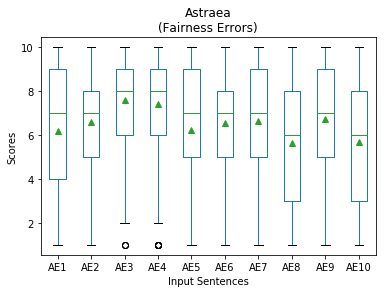

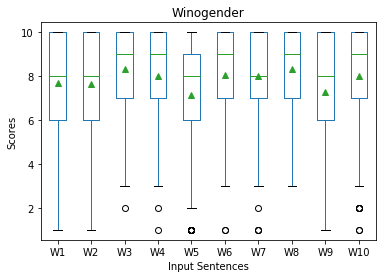

In [13]:
xtick_labels = ['ANE1', 'ANE2', 'ANE3', 'ANE4', 'ANE5', 'ANE6', 'ANE7', 'ANE8', 'ANE9', 'ANE10']
ax = boxplot_arr(astraea_clean_cols, title = "Astraea\n(Non-Fairness Errors)",
                 save_figure = True, save_figure_name='astraea-clean-box-plot.pdf', xticklabels=xtick_labels)
# ax.savefig('astraea-clean-box-plot.pdf')

xtick_labels = ['AE1', 'AE2', 'AE3', 'AE4', 'AE5', 'AE6', 'AE7', 'AE8', 'AE9', 'AE10']

boxplot_arr(astraea_error_cols, title = "Astraea\n(Fairness Errors)", 
            save_figure = True, save_figure_name='astraea-errors-box-plot.pdf', xticklabels=xtick_labels)
# ax.figure.savefig('astraea-errors-box-plot.pdf')

xtick_labels = ['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10']
boxplot_arr(winogender_cols, title = "Winogender", 
            save_figure = True, save_figure_name='winogender-box-plot.pdf', xticklabels=xtick_labels)
# ax.figure.savefig('winogender-box-plot.pdf')

In [14]:
# def savefig(ax, nam)